# Finite Elasticity Part I

Authors: Jack S. Hale, Corrado Maurini.

Uses elements from https://jorgensd.github.io/dolfinx-tutorial/chapter2/hyperelasticity.html under CC BY 4.0

## Summary

In this notebook we will give an example of solving for the displacement field of a geometrically non-linear bar sagging under its own weight.

## Motivation

<img src="images/mazier_et_al_beam.jpeg" alt="drawing" width="500"/>

The above image shows image shows the *deformed configuration* of an initially straight silicone beam with cylindrical cross-section under its own weight. This material is very soft and quite dense. The resulting rotations and strains are large, so the assumptions made in a geometrically linear elastic model

 are no longer valid. For sensible predictions we must use the theory of finite elasticity. Source: Mazier et al. https://arxiv.org/abs/2102.13455

## Learning objectives

1. Briefly revisit the equations of non-linear elasticity.
1. Be able to express the Lagrangian of a geometrically non-linear elastic body in the Unified Form Language (UFL) of the FEniCS Project.
2. Use the automatic differentiation capabilities to derive symbolic expressions for the residual and Jacobian.
2. Understand and implement basic methods for solving non-linear problems in PETSc (Portable, Extensible Toolkit for Scientific Computation).
3. See the difference in results between a geometrically linear and non-linear analysis.
4. Become aware of the possible effects and solutions to the problem of numerical locking.

## Possible extensions

1. In class: Change boundary conditions to vertical beam under traction.
1. To a three-dimensional analysis.
2. Displacement-pressure (mixed) formulation to cure numerical locking.

In [44]:
import numpy as np

from mpi4py import MPI

import dolfinx
import dolfinx.plot

L = 1.0
H = 0.2
mesh = dolfinx.RectangleMesh(MPI.COMM_WORLD, [(0.0, 0.0, 0.0), (L, H, 0.0)], [20, 10])

V = dolfinx.VectorFunctionSpace(mesh, ("CG", 1))

def left(x):
    #print(x.shape)
    #print(x)
    is_close = np.isclose(x[0], 0.0)
    #print(is_close)
    return is_close

left_facets = dolfinx.mesh.locate_entities_boundary(mesh, mesh.topology.dim - 1, left)

In [33]:
from matplotlib.pyplot import imshow
import pyvista
from pyvista.utilities.xvfb import start_xvfb
start_xvfb(wait=0.0)

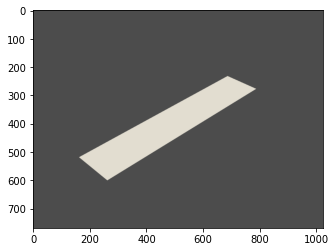

In [34]:
p = pyvista.Plotter(window_size=[1024,768])
topology, cell_types = dolfinx.plot.create_vtk_topology(mesh, mesh.topology.dim)
grid = pyvista.UnstructuredGrid(topology, cell_types, mesh.geometry.x)
p.add_mesh(grid)
imshow(p.screenshot())